# Numerical prove of Keppler 2nd


In [14]:
import numpy as np
import matplotlib.pyplot as plt

mass_sun = 1.989e30  # kg
mass_earth = 5.972e24  # kg
mass_halley = 2.2e14  # kg

G = 6.67430e-11  # m^3 kg^-1 s^-2

# perihelion
v_earth = 30.29e3  # m/s
r_earth = 147.10e9  # m

v_halley = 54.55e3  # m/s
r_halley = 0.586 * r_earth  # m 

# settings
dt = 24 * 3600  # seconds
t = 75 * 370 * 24 * 3600  # seconds
N = int(t / dt)

# Ic.
v_e = np.zeros((N,2))
v_e[0,:] = [0,v_earth]

r_e = np.zeros((N,2))
r_e[0,:] = [r_earth,0]

v_h = np.zeros((N,2))
v_h[0,:] = [0,v_halley]

r_h = np.zeros((N,2))
r_h[0,:] = [r_halley,0]

t_arr = np.linspace(0,t+dt,N)

In [6]:
# RK4 method 
for i in range(1, N):
    # r and v at time t
    r0 = r_h[i-1, :]
    v0 = v_h[i-1, :]

    def acceleration(r):
        r_norm = np.linalg.norm(r)
        return -G * mass_sun * r / r_norm**3

    # k1
    k1_v = acceleration(r0) * dt
    k1_r = v0 * dt

    # k2
    k2_v = acceleration(r0 + 0.5 * k1_r) * dt
    k2_r = (v0 + 0.5 * k1_v) * dt

    # k3
    k3_v = acceleration(r0 + 0.5 * k2_r) * dt
    k3_r = (v0 + 0.5 * k2_v) * dt

    # k4
    k4_v = acceleration(r0 + k3_r) * dt
    k4_r = (v0 + k3_v) * dt

    # update velocity and position
    v_h[i, :] = v0 + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6
    r_h[i, :] = r0 + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6



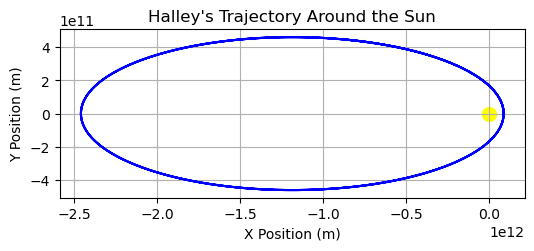

In [13]:
# Plotting the trajectory
plt.figure(figsize=(6, 6))
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')

plt.plot(r_h[:, 0], r_h[:, 1], label='Earth Trajectory', color='blue')

plt.scatter(0, 0, color='yellow', s=100, label='Sun')  # Sun at origin
plt.gca().set_aspect('equal')
# plt.title('Earth Trajectory Around the Sun')
plt.title('Halley\'s Trajectory Around the Sun')


plt.grid()
#plt.legend()
plt.show()